In [818]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

Preparing Data

In [819]:
df_train = pd.read_csv('Blood_samples_dataset_balanced.csv')
df_test = pd.read_csv('Blood_samples_dataset_test.csv')
df = pd.concat([df_train, df_test], ignore_index=True)

In [820]:
df.shape

(2837, 25)

In [821]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [822]:
feature_df = df.drop(['Disease'], axis=1)
label_df = df['Disease']

In [823]:
label_df.value_counts()

Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: Disease, dtype: int64

In [824]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [825]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

Logistic Regression

In [826]:
LRmodel = LogisticRegression(multi_class='ovr',solver='liblinear')
LRmodel.fit(X_train, y_train)
LRpred = LRmodel.predict(X_test)
print(classification_report(y_test, LRpred))
LRaccuracy = accuracy_score(y_test, LRpred)
print("Accuracy:", LRaccuracy)

              precision    recall  f1-score   support

      Anemia       0.81      0.90      0.85       137
    Diabetes       0.86      0.74      0.80       164
     Healthy       0.79      0.75      0.77       122
    Heart Di       0.09      0.43      0.15         7
    Thalasse       0.84      0.75      0.79       102
    Thromboc       0.92      0.94      0.93        36

    accuracy                           0.79       568
   macro avg       0.72      0.75      0.72       568
weighted avg       0.82      0.79      0.80       568

Accuracy: 0.7904929577464789


K Nearest Neighbors

In [827]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train, y_train)
KNNpred = KNNmodel.predict(X_test)
print(classification_report(y_test, KNNpred))
KNNaccuracy = accuracy_score(y_test, KNNpred)
print("Accuracy:", KNNaccuracy)

              precision    recall  f1-score   support

      Anemia       0.94      0.90      0.92       137
    Diabetes       0.96      0.73      0.83       164
     Healthy       0.95      0.99      0.97       122
    Heart Di       0.10      0.57      0.17         7
    Thalasse       0.93      0.89      0.91       102
    Thromboc       0.72      0.92      0.80        36

    accuracy                           0.87       568
   macro avg       0.77      0.83      0.77       568
weighted avg       0.92      0.87      0.89       568

Accuracy: 0.8661971830985915


SVC

In [828]:
SVCmodel = SVC()
SVCmodel.fit(X_train, y_train)
SVCpred = SVCmodel.predict(X_test)
print(classification_report(y_test, SVCpred))
SVCaccuracy = accuracy_score(y_test, SVCpred)
print("Accuracy:", SVCaccuracy)

              precision    recall  f1-score   support

      Anemia       0.94      0.91      0.93       137
    Diabetes       0.86      0.97      0.91       164
     Healthy       0.99      0.99      0.99       122
    Heart Di       0.00      0.00      0.00         7
    Thalasse       0.98      0.92      0.95       102
    Thromboc       1.00      0.92      0.96        36

    accuracy                           0.94       568
   macro avg       0.80      0.79      0.79       568
weighted avg       0.93      0.94      0.93       568

Accuracy: 0.9366197183098591


c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Random Forest

In [829]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
RFpred = RFmodel.predict(X_test)
print(classification_report(y_test, RFpred))
RFaccuracy = accuracy_score(y_test, RFpred)
print("Accuracy:", RFaccuracy)

              precision    recall  f1-score   support

      Anemia       1.00      0.91      0.95       137
    Diabetes       0.87      1.00      0.93       164
     Healthy       1.00      0.98      0.99       122
    Heart Di       0.50      0.57      0.53         7
    Thalasse       1.00      0.91      0.95       102
    Thromboc       1.00      0.94      0.97        36

    accuracy                           0.95       568
   macro avg       0.89      0.89      0.89       568
weighted avg       0.96      0.95      0.95       568

Accuracy: 0.948943661971831


Summary

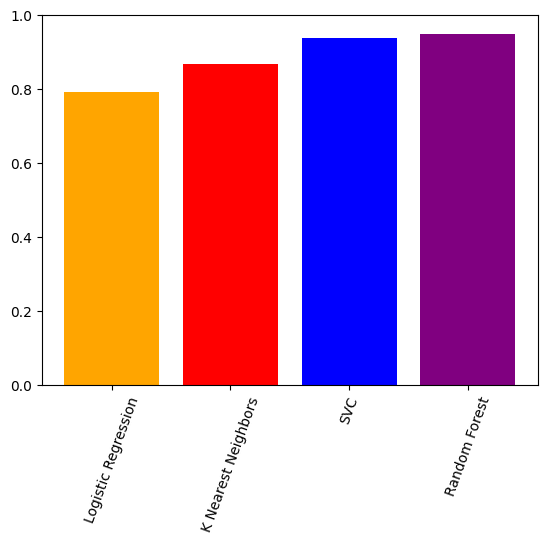

In [830]:
plt.bar(['Logistic Regression', 'K Nearest Neighbors', 'SVC', 'Random Forest'], [LRaccuracy, KNNaccuracy, SVCaccuracy, RFaccuracy], color = ['orange', 'red', 'blue', 'purple'])
plt.xticks(rotation = 70)
plt.gca().set_ylim([0, 1.0])
plt.show()